In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split,cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
import seaborn as sns
import glob

In [6]:
# Step 1: Read the first CSV file
first_file_path = r'C:\Users\kat92\Documents\GitHub\SupplyChainManagement\data\processed\processed_data_1.csv'  # Specify the path to the first CSV file
df_first = pd.read_csv(first_file_path)

# Step 2: Create a list to hold all DataFrames
dataframes = [df_first]

# Step 3: Read all other CSV files, skipping the header
# Use glob to find all CSV files in the directory
csv_files = glob.glob(r'C:\Users\kat92\Documents\GitHub\SupplyChainManagement\data\processed*.csv')  # Adjust the path as necessary

# Skip the first file in the list since it's already read
for file in csv_files:
    if file != first_file_path:  # Skip the first file
        # Read the CSV, skipping the header
        df_next = pd.read_csv(file, header=None)  # Use header=None to skip the header
        # Ensure the data types match the first DataFrame
        df_next.columns = df_first.columns  # Set the column names
        df_next = df_next.astype(df_first.dtypes.to_dict())  # Match dtypes
        
        # Add to the list of DataFrames
        dataframes.append(df_next)

# Step 4: Concatenate all DataFrames into a single DataFrame
data = pd.concat(dataframes, ignore_index=True)

In [7]:
data

,Product Type,SKU,Price,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,...,Inspection results_Pass,Transportation modes_Air,Transportation modes_Road,Transportation modes_Sea,Availability_In Stock,Availability_Out of Stock,Availability_Pre-Order,Customer demographics_Adult,Customer demographics_Senior,Customer demographics_Teen
0,Eyeliner,1029,85.15,213,7262.41,149,13,7,5,DHL,...,True,False,True,False,False,True,False,False,True,False
1,Eyeliner,1012,18.35,219,6338.75,30,10,45,5,UPS,...,True,False,False,True,False,True,False,False,True,False
2,Eyeliner,1020,26.37,293,3157.68,339,12,94,5,USPS,...,False,False,False,True,True,False,False,False,False,True
3,Lipstick,1018,66.03,364,7391.89,158,1,73,7,USPS,...,False,False,True,False,False,True,False,False,False,True
4,Foundation,1005,94.48,423,5597.19,26,14,69,8,FedEx,...,True,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155496,Lipstick,1046,33.06,368,9550.24,336,7,96,6,USPS,...,True,False,True,False,True,False,False,True,False,False
155497,Foundation,1037,61.07,360,5275.48,228,10,84,5,FedEx,...,False,False,False,True,False,False,True,False,False,True
155498,Lipstick,1021,26.38,879,6623.47,249,1,88,5,UPS,...,False,False,True,False,False,False,True,False,False,True
155499,Mascara,1015,14.10,84,6976.56,307,12,50,2,UPS,...,True,False,False,True,False,True,False,True,False,False


In [8]:
data.columns

Index(['Product Type', 'SKU', 'Price', 'Number of products sold',
       'Revenue generated', 'Stock levels', 'Lead times', 'Order quantities',
       'Shipping times', 'Shipping carriers', 'Shipping costs',
       'Supplier name', 'Location', 'Production volumes',
       'Manufacturing lead time', 'Manufacturing costs', 'Defect rates',
       'Routes', 'Costs', 'Timestamp', 'Day', 'Month', 'Year',
       'Inspection results_Fail', 'Inspection results_Pass',
       'Transportation modes_Air', 'Transportation modes_Road',
       'Transportation modes_Sea', 'Availability_In Stock',
       'Availability_Out of Stock', 'Availability_Pre-Order',
       'Customer demographics_Adult', 'Customer demographics_Senior',
       'Customer demographics_Teen'],
      dtype='object')

In [70]:
x = data[['SKU', 'Price', 'Revenue generated', 'Lead times', 'Shipping times',
           'Shipping costs', 'Production volumes', 'Manufacturing lead time', 
           'Manufacturing costs', 'Defect rates', 'Routes', 'Costs']]
y = data[['Stock levels']]

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state= 42)

In [72]:
scaler = StandardScaler()# Scale the data 
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [73]:
# Train a linear regression model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [74]:
# Evaluate the model on the testing set
y_pred = model.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 3.671777941538501e-05


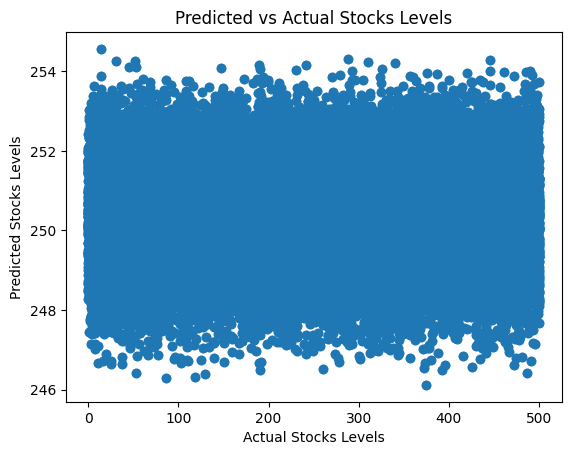

In [75]:


# Create a scatter plot with the actual Stocks Levels on the x-axis and the predicted Stocks Levels values on the y-axis
plt.scatter(y_test, y_pred)

# Plot a regression line to see how well the model has fit the data
sns.regplot(x=y_test, y=y_pred)

plt.xlabel('Actual Stocks Levels')
plt.ylabel('Predicted Stocks Levels')
plt.title('Predicted vs Actual Stocks Levels')
plt.show()

In [15]:

df = pd.read_csv(r'C:\Users\kat92\Documents\GitHub\SupplyChainManagement\data\processed\processed_data_1.csv')

In [94]:
x = df[['Price', 'Revenue generated', 'Lead times', 'Shipping times',
           'Shipping costs', 'Production volumes', 'Manufacturing lead time', 
           'Manufacturing costs',
            'Defect rates', 'Routes', 'Costs' ]]
y = df[['Stock levels']]

In [105]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42)

In [106]:
scaler = StandardScaler()# Scale the data 
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [107]:
# Train a linear regression model
model2 = LinearRegression()
model2.fit(x_train_scaled, y_train)

LinearRegression()

In [108]:
# Evaluate the model on the testing set
y_pred = model2.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: -4.3358068000154404e-05
